<div style="max-width:1200px"><img src="../_resources/mgnify_banner.png" width="100%"></div>

<img src="../_resources/mgnify_logo.png" width="200px">

# GSC23 MGnify Workshop Advanced Session - Practical Exercise

### Aims:

* become familiar with the MGnify API and learn to access it programmatically
* explore the MGnify Genomes resource using Python

### How this notebook works: 

This is an interactive code notebook (a Jupyter Notebook).
To run this code, click into each cell and press the ▶ button in the top toolbar, or press `shift+enter`.

### This notebook is divided into 3 sections: 

- Section 1 focuses on MGnify Analyses (metagenomic datasets and assemblies analysed by MGnify)
- Section 2 focuses on the MGnify Genomes resource (the genome catalogues)
- Bonus section allows you to practice writing your own code to query the API
---

### Import packages

Execute the code below to import the Python libraries required to run the examples presented in this notebook.

In [354]:
# Connection to MGnify API
from jsonapi_client import Session as APISession
from jsonapi_client import Modifier  # allows us to query specific values in given fields (e.g.: 'taxon-lineage').
import requests
from itertools import islice

# Dataframes and display
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline 

# Data download
from urllib.request import urlretrieve

# Warning verbosity
import warnings 
warnings.filterwarnings(action="ignore")

---

## Section 1: explore MGnify analysis results programmatically

In the first portion of today's workhop you learned about MGnify's analysis of metagenomic data. In this exercise we will fetch and explore MGnify analysis results programmatically. These are just a few examples of the types of commands and operations that can be peformed.

#### Task 1: Browse the recently analysed studies and save them to a file

Let's start by loading 50 most recently analysed studies and saving them to a file called ```studies.csv``` (it would take too long to load all studies for this example so we limit the number at 50):

In [55]:
endpoint = 'studies'

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    resources = map(lambda r: r.json, islice(mgnify.iterate(endpoint), 50))
    resources = pd.json_normalize(resources)
    resources.to_csv(f"{endpoint}.csv")

Click on the three dots below to open up a line by line explanation of this code block.

In [246]:
endpoint = 'studies'
# An "endpoint" is the specific resource within the API which we want to get data from. 
# It is the URL relative to the "server base URL" of the API, which for MGnify is 
# https://www.ebi.ac.uk/metagenomics/api/v1.
# You can find the endpoints in the API Docs https://www.ebi.ac.uk/metagenomics/api/docs/ 

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    # Calling "APISession" is enabling a connection to the MGnify API, that can be used multiple times. 
    # The `with...as mgnify` syntax is a Python "context". 
    # Everything inside the `with...` block (i.e. indented lines below it) can use the APISession 
    # which we've called mgnify here. 
    # When the `with` block closes (the indentation stops), the connection to the API is cleaned up.

    resources = map(lambda r: r.json, islice(mgnify.iterate(endpoint), 50))
    # `map` applies a function to every element of an iterable - so do something to each thing in a list.
    # The MGnify API is paginated, which means query results are broken up into pages for easier handling.
    # `mgnify.iterate(endpoint)` is a very helpful function that loops over as many pages of results as 
    # there are.
    # `lambda r: r.json` is grabbing the JSON attribute from each study returned from the API.
    # The islice() function from the itertools module is used to limit the number of results to 50. 
    # It ensures that only the first 50 items will be processed. We added this to avoid loading all of 
    # the studies, which would take a long time.
    # All together, this makes `resources` be 50 JSON representations we could loop through, each containing 
    # the data of a study.

    resources = pd.json_normalize(resources)
    # pd is the shorthand for the pandas package - you'll see it anywhere people are using pandas.
    # The json_normalize function takes "nested" data and turns it into a table.

    resources.to_csv(f"{endpoint}.csv")
    # Pandas has a built-in way of writing CSV (or TSV, etc) files, which is helpful for getting data into 
    # other tools. This writes the table-ified study list to a file called studies.csv.

Studies have been saved to file. Double-click on the file name ```studies.csv``` in the left-hand panel to open it. You can see the list of study accessions and information about each of them.

#### Task 2: Explore a selected a study

Pick a study to load and explore in more detail. In the code below we picked study MGYS00001935 as the default, however, you can choose a different study accession from [the MGnify website](https://www.ebi.ac.uk/metagenomics/browse/studies/) or from the ```studies.csv``` file you just generated. When you execute the code block below, a prompt window will appear. When that happens, paste the study accession you chose into the window and press 'Enter'. To use the default, press 'Enter' without pasting anything into the window. 

In [244]:
from lib.variable_utils import get_variable_from_link_or_input

accession = get_variable_from_link_or_input('MGYS', 'Study Accession', 'MGYS00001935')

# you could also assign the accession value directly:
# accession = 'MGYS00001935'

Type a Study Accession [default: MGYS00001935] 


Using "MGYS00001935" as Study Accession


#### Fetch data for the selected study

Load analyses from this study into a [Pandas dataframe](https://pandas.pydata.org/docs/user_guide/index.html). Pandas is a Python library that is widely used to work with and manipulate data. A dataframe is a table with rows and columns. Note that we will be using a different endpoint here because now we are fetching analyses rather than studies.

In [233]:
endpoint = f"studies/{accession}/analyses"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    analyses = map(lambda r: r.json, mgnify.iterate(endpoint))
    analyses = pd.json_normalize(analyses)

#### Inspect the data

Analyses from the study are now loaded into the dataframe ```analyses```. The ```.head()``` method prints the first few rows of the table:

In [225]:
analyses.head()

,type,id,attributes.accession,attributes.analysis-status,attributes.pipeline-version,attributes.analysis-summary,attributes.experiment-type,attributes.is-private,attributes.complete-time,attributes.instrument-platform,attributes.instrument-model,relationships.sample.data.id,relationships.sample.data.type,relationships.run.data.id,relationships.run.data.type,relationships.study.data.id,relationships.study.data.type
0,analysis-jobs,MGYA00646965,MGYA00646965,completed,5.0,"[{'key': 'Submitted nucleotide sequences', 'value': '16279'}, {'key': 'Nucleotide sequences after format-specific filtering', 'value': '11515'}, {'key': 'Nucleotide sequences after length filtering', 'value': '11515'}, {'key': 'Nucleotide sequences after undetermined bases filtering', 'value': '11515'}, {'key': 'Predicted SSU sequences', 'value': '10046'}, {'key': 'Predicted LSU sequences', 'value': '0'}]",amplicon,False,2023-07-19T14:11:39,LS454,454 GS FLX,ERS161286,samples,ERR162887,runs,MGYS00006253,studies
1,analysis-jobs,MGYA00646967,MGYA00646967,completed,5.0,"[{'key': 'Submitted nucleotide sequences', 'value': '9967'}, {'key': 'Nucleotide sequences after format-specific filtering', 'value': '9113'}, {'key': 'Nucleotide sequences after length filtering', 'value': '9113'}, {'key': 'Nucleotide sequences after undetermined bases filtering', 'value': '9113'}, {'key': 'Predicted SSU sequences', 'value': '8431'}, {'key': 'Predicted LSU sequences', 'value': '0'}]",amplicon,False,2023-07-19T14:11:59,LS454,454 GS FLX,ERS161300,samples,ERR162901,runs,MGYS00006253,studies
2,analysis-jobs,MGYA00646970,MGYA00646970,completed,5.0,"[{'key': 'Submitted nucleotide sequences', 'value': '8658'}, {'key': 'Nucleotide sequences after format-specific filtering', 'value': '7850'}, {'key': 'Nucleotide sequences after length filtering', 'value': '7850'}, {'key': 'Nucleotide sequences after undetermined bases filtering', 'value': '7850'}, {'key': 'Predicted SSU sequences', 'value': '7057'}, {'key': 'Predicted LSU sequences', 'value': '0'}]",amplicon,False,2023-07-19T14:12:24,LS454,454 GS FLX,ERS161297,samples,ERR162898,runs,MGYS00006253,studies
3,analysis-jobs,MGYA00646973,MGYA00646973,completed,5.0,"[{'key': 'Submitted nucleotide sequences', 'value': '7008'}, {'key': 'Nucleotide sequences after format-specific filtering', 'value': '6632'}, {'key': 'Nucleotide sequences after length filtering', 'value': '6632'}, {'key': 'Nucleotide sequences after undetermined bases filtering', 'value': '6632'}, {'key': 'Predicted SSU sequences', 'value': '6556'}, {'key': 'Predicted LSU sequences', 'value': '0'}]",amplicon,False,2023-07-19T14:12:50,LS454,454 GS FLX,ERS161295,samples,ERR162896,runs,MGYS00006253,studies
4,analysis-jobs,MGYA00646976,MGYA00646976,completed,5.0,"[{'key': 'Submitted nucleotide sequences', 'value': '8317'}, {'key': 'Nucleotide sequences after format-specific filtering', 'value': '7225'}, {'key': 'Nucleotide sequences after length filtering', 'value': '7225'}, {'key': 'Nucleotide sequences after undetermined bases filtering', 'value': '7225'}, {'key': 'Predicted SSU sequences', 'value': '6692'}, {'key': 'Predicted LSU sequences', 'value': '0'}]",amplicon,False,2023-07-19T14:13:10,LS454,454 GS FLX,ERS161294,samples,ERR162895,runs,MGYS00006253,studies


#### Exploring the data - Example 1: distribution of sequencing instruments used for the analysed samples

Let's make a plot showing what instrument type(s) were used to sequence the samples in the study we just loaded.

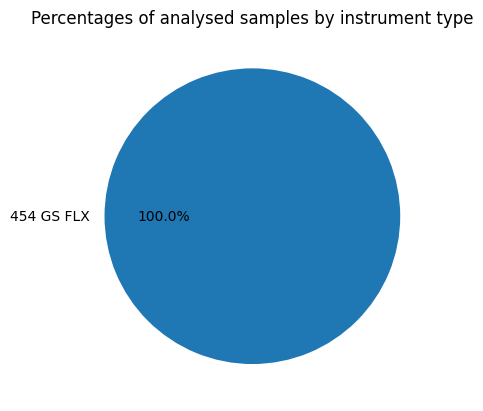

In [226]:
analyses.groupby('attributes.instrument-model').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of analysed samples by instrument type');

Click on the three dots below to open up an explanation of how this code works.

```analyses.groupby('attributes.instrument-model')```: the groupby operation here groups the data 
in the dataframe ```analyses``` based on the values in the column ```attributes.instrument-model```. That means it groups the data according to the instrument models mentioned in that column.

The ```.size()``` function is applied after grouping to count the number of occurrences (size) of each group. It counts how many samples were analyzed using each instrument model.

```.plot(kind='pie', autopct='%1.1f%%')```: this line creates a pie chart from the grouped and counted data. The ```kind='pie'``` parameter specifies that a pie chart should be plotted. The ```autopct='%1.1f%%'``` parameter formats the percentage values in the pie chart to show one decimal place.

```plt.title('Percentages of analysed samples by instrument type')```: this line sets the title of the pie chart to "Percentages of analysed samples by instrument type."

#### Exploring the data - Example 2: filtering results

You might have noticed while exploring the dataframe ```analyses``` above that the column ```attributes.analysis-summary``` contains JSONs as its values. Let's run a Python code to add the information from these JSONs as new columns to the dataframe:

In [247]:
# Save all possible JSON keys into a list "all_keys"
all_keys = [
    'Submitted nucleotide sequences',
    'Nucleotide sequences after format-specific filtering',
    'Nucleotide sequences after length filtering',
    'Nucleotide sequences after undetermined bases filtering',
    'Predicted SSU sequences',
    'Predicted LSU sequences',
    'Reads with predicted CDS',
    'Reads with predicted RNA',
    'Reads with InterProScan match',
    'Predicted CDS',
    'Predicted CDS with InterProScan match',
    'Total InterProScan matches'
]

# Iterate over each row of the 'attributes.analysis-summary' column, extract information 
# and save to a temporary dictionary. If an analysis doesn't have a value for any of the keys
# from the all_keys list, insert "N/A"
extracted_data = dict()
for row in analyses['attributes.analysis-summary']:
    result_dict = {item['key']: item['value'] for item in row}
    for key in all_keys:
        add_value = result_dict[key] if key in result_dict else "N/A"
        extracted_data.setdefault(key, list()).append(add_value)
        
# Convert the dictionary to a DataFrame
extracted_df = pd.DataFrame(extracted_data)

# Concatenate the two dataframes into a new one called transformed_analyses 
transformed_analyses = pd.concat([analyses, extracted_df], axis=1)

# Remove the attributes.analysis-summary column from the new dataframe
transformed_analyses.drop('attributes.analysis-summary', axis=1, inplace=True)

# Display the first few rows of the resulting dataframe
transformed_analyses.head()

,type,id,attributes.experiment-type,attributes.accession,attributes.analysis-status,attributes.pipeline-version,attributes.is-private,attributes.complete-time,attributes.instrument-platform,attributes.instrument-model,relationships.study.data.id,relationships.study.data.type,relationships.run.data.id,relationships.run.data.type,relationships.sample.data.id,relationships.sample.data.type,Submitted nucleotide sequences,Nucleotide sequences after format-specific filtering,Nucleotide sequences after length filtering,Nucleotide sequences after undetermined bases filtering,Predicted SSU sequences,Predicted LSU sequences,Reads with predicted CDS,Reads with predicted RNA,Reads with InterProScan match,Predicted CDS,Predicted CDS with InterProScan match,Total InterProScan matches
0,analysis-jobs,MGYA00646965,amplicon,MGYA00646965,completed,5.0,False,2023-07-19T14:11:39,LS454,454 GS FLX,MGYS00006253,studies,ERR162887,runs,ERS161286,samples,16279,11515,11515,11515,10046,0,N/A,N/A,N/A,N/A,N/A,N/A
1,analysis-jobs,MGYA00646967,amplicon,MGYA00646967,completed,5.0,False,2023-07-19T14:11:59,LS454,454 GS FLX,MGYS00006253,studies,ERR162901,runs,ERS161300,samples,9967,9113,9113,9113,8431,0,N/A,N/A,N/A,N/A,N/A,N/A
2,analysis-jobs,MGYA00646970,amplicon,MGYA00646970,completed,5.0,False,2023-07-19T14:12:24,LS454,454 GS FLX,MGYS00006253,studies,ERR162898,runs,ERS161297,samples,8658,7850,7850,7850,7057,0,N/A,N/A,N/A,N/A,N/A,N/A
3,analysis-jobs,MGYA00646973,amplicon,MGYA00646973,completed,5.0,False,2023-07-19T14:12:50,LS454,454 GS FLX,MGYS00006253,studies,ERR162896,runs,ERS161295,samples,7008,6632,6632,6632,6556,0,N/A,N/A,N/A,N/A,N/A,N/A
4,analysis-jobs,MGYA00646976,amplicon,MGYA00646976,completed,5.0,False,2023-07-19T14:13:10,LS454,454 GS FLX,MGYS00006253,studies,ERR162895,runs,ERS161294,samples,8317,7225,7225,7225,6692,0,N/A,N/A,N/A,N/A,N/A,N/A


Scroll to the right to see the newly added fields.

Let's filter the results to only show analyses that have at least 1 predicted LSU (large ribosomal subunit) sequence:

In [230]:
# Create a new dataframe called filtered_analyses which will include all lines from the
# transformed_analyses dataframe except for the ones where the value in the "Predicted LSU sequences"
# column is "0" or "N/A"
filtered_analyses = transformed_analyses[
    ~(transformed_analyses['Predicted LSU sequences'].isin(['0', 'N/A']))
]

# print the filtered dataframe
filtered_analyses

,type,id,attributes.accession,attributes.analysis-status,attributes.pipeline-version,attributes.experiment-type,attributes.is-private,attributes.complete-time,attributes.instrument-platform,attributes.instrument-model,relationships.sample.data.id,relationships.sample.data.type,relationships.run.data.id,relationships.run.data.type,relationships.study.data.id,relationships.study.data.type,Submitted nucleotide sequences,Nucleotide sequences after format-specific filtering,Nucleotide sequences after length filtering,Nucleotide sequences after undetermined bases filtering,Predicted SSU sequences,Predicted LSU sequences,Reads with predicted CDS,Reads with predicted RNA,Reads with InterProScan match,Predicted CDS,Predicted CDS with InterProScan match,Total InterProScan matches


##### Q: How many analyses have at least 1 predicted LSU? 

<b>Hint</b>: look at the dataframe dimensions that are printed below the dataframe. What is the number of rows? Note that some studies might not have any predicted LSU sequences and the dataframe above could be empty.  
You could also find the number of rows in the dataframe by executing the code:

In [231]:
filtered_analyses.shape[0]

0

You can similarly filter the results using any of the other columns depending on what you are interested in.

#### Exploring the data - Example 3: download the analysis results files

Now let's fetch the actual results files. To do that we will use the ```/analyses/{accession}/downloads``` endpoint. For the purposes of this exercise we will download the results for only the first 2 analyses from the unfiltered dataframe ```analyses``` but in your own work you could download them all or download only the ones that passed the filters that you applied. 

There are different result files available, let's first check which ones we could download:

In [250]:
endpoint = f"analyses/{analysisId}/downloads"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as session:
     for analysisId in analyses.head(2)['attributes.accession']:
         print(f"\nFiles available for analysis {analysisId}:")
         for download in session.iterate(endpoint):
                print(f"{download.alias}: {download.description.label}")


Files available for analysis MGYA00646965:
ERR162901_FASTQ.fasta.gz: Processed nucleotide reads
ERR162901_FASTQ_SSU.fasta.gz: Reads encoding SSU rRNA
ERR162901_FASTQ_SSU_MAPSeq.mseq.gz: MAPseq SSU assignments
ERR162901_FASTQ_SSU_OTU.tsv: OTUs, counts and taxonomic assignments for SSU rRNA
ERR162901_FASTQ_SSU_OTU_TABLE_HDF5.biom: OTUs, counts and taxonomic assignments for SSU rRNA
ERR162901_FASTQ_SSU_OTU_TABLE_JSON.biom: OTUs, counts and taxonomic assignments for SSU rRNA

Files available for analysis MGYA00646967:
ERR162901_FASTQ.fasta.gz: Processed nucleotide reads
ERR162901_FASTQ_SSU.fasta.gz: Reads encoding SSU rRNA
ERR162901_FASTQ_SSU_MAPSeq.mseq.gz: MAPseq SSU assignments
ERR162901_FASTQ_SSU_OTU.tsv: OTUs, counts and taxonomic assignments for SSU rRNA
ERR162901_FASTQ_SSU_OTU_TABLE_HDF5.biom: OTUs, counts and taxonomic assignments for SSU rRNA
ERR162901_FASTQ_SSU_OTU_TABLE_JSON.biom: OTUs, counts and taxonomic assignments for SSU rRNA


As an example, let's download only the tables containing the taxonomic assignments for SSU rRNA.

In [373]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as session:    
     for analysisId in analyses.head(2)['attributes.accession']:
         print(f"Processing: {analysisId}")
         for download in session.iterate(
             f"analyses/{analysisId}/downloads"
         ):
            # Start another for loop to go over the files to download
             OTUFiles = f"{analysisId}_MERGED_FASTQ_SSU_OTU.tsv"
             if (
                 download.description.label =='OTUs, counts and taxonomic assignments for SSU rRNA'
                 and
                 download.file_format.name == 'TSV'
             ):
                 print(f"Downloading file for {analysisId}")
                 urlretrieve(download.links.self.url, OTUFiles)
                 break
         print("Finished for", analysisId)

Processing: MGYA00646965
Finished for MGYA00646965
Processing: MGYA00646967
Finished for MGYA00646967


Click on the three dots below to see an explanation for how this code works.

In [259]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as session:
    # Starting a connection to MGnify's API just like we did before
    
     for analysisId in analyses.head(2)['attributes.accession']:
        # Here we are starting a for loop to iterate over values in the 'attributes.accession' column
        # of the analyses dataframe (this column contains analysis accessions). However, we only want 
        # to iterate over the first two accessions which is why we use the .head(2) method to give us 
        # just the first 2 records.
        
         print(f"Processing: {analysisId}")
        # Print the analysis accession we are currently processing
        
         for download in session.iterate(
             f"analyses/{analysisId}/downloads"
         ):
            # Start another for loop and use the .iterate() method to retrieve information about downloads 
            # associated with the current analysis ID. The method call is formatted with the analysisId to 
            # form the specific API endpoint: analyses/{analysisId}/downloads where the value for analysisId
            # will be plugged in for each iteration.
            
             OTUFiles = f"{analysisId}_MERGED_FASTQ_SSU_OTU.tsv"
            # This line generates the file name of the OTU results file: analysis accession followed by the
            # string "_MERGED_FASTQ_SSU_OTU.tsv"
            
             if (
                 download.description.label =='OTUs, counts and taxonomic assignments for SSU rRNA'
                 and
                 download.file_format.name == 'TSV'
             ):
                # We only want to download the OTU files in this case and not any other result files. 
                # This piece of code is looking for those files by checking the format and file description.
                # Once the correct format and description are found, the next block of code is executed.
                 print(f"Downloading file for {analysisId}")
                 urlretrieve(download.links.self.url, OTUFiles)
                # Fetch the file link to which is stored in download.links.self.url. When saving the file locally,
                # give it the name stored in the variable OTUFiles (f"{analysisId}_MERGED_FASTQ_SSU_OTU.tsv")
                 break
                # After downloading the file, the code breaks out of the inner for loop since only one matching 
                # file is needed for each analysis ID. We don't need to check any more records.
         print("Finished for", analysisId)


Processing: MGYA00646965
Finished for MGYA00646965
Processing: MGYA00646967
Finished for MGYA00646967


You can see the downloaded tables in the left-hand panel. Double-click the file names to open and browse them.

---

## Section 2: exploring the MGnify Genomes resource programmatically

In this section of the practical exercise we will look at a few ways how Python can be used to explore the MGnify Genomes resource via the API. 

#### Task 1: Query the ```genomes``` database from MGnify API

We will be using the ```genomes``` endpoint to work with MGnify Genomes:

In [355]:
endpoint = 'genomes'

Let's fetch data from this endpoint and see what the first result looks like:

In [263]:
r = requests.get(f"https://www.ebi.ac.uk/metagenomics/api/v1/{endpoint}")
r.json()['data'][0]

{'type': 'genomes',
 'id': 'MGYG000321626',
 'attributes': {'genome-id': 17285,
  'geographic-range': [],
  'geographic-origin': 'Europe',
  'accession': 'MGYG000321626',
  'ena-genome-accession': None,
  'ena-sample-accession': 'SAMN33097420',
  'ena-study-accession': None,
  'ncbi-genome-accession': 'GCA_028655675',
  'ncbi-sample-accession': None,
  'ncbi-study-accession': 'PRJNA931735',
  'img-genome-accession': None,
  'patric-genome-accession': None,
  'length': 1881475,
  'num-contigs': 145,
  'n-50': 32562,
  'gc-content': 49.81,
  'type': 'Isolate',
  'completeness': 99.03,
  'contamination': 0.0,
  'rna-5s': 93.28,
  'rna-16s': 99.41,
  'rna-23s': 97.64,
  'trnas': 20.0,
  'nc-rnas': 26,
  'num-proteins': 1803,
  'eggnog-coverage': 95.73,
  'ipr-coverage': 89.24,
  'taxon-lineage': 'd__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus delbrueckii',
  'num-genomes-total': 1,
  'pangenome-size': None,
  'pangenome-core-siz

Here we are looking at one genome, the metadata for this genome, results summary and links. You can see what types of information we can get for each genome from this API endpoint. Take a moment to look over the output.

##### Q: can you spot what catalogue this genome is from?

##### Q: what is the taxon lineage for this genome?

#### Task 2: Search for a specific taxon

If we are interested in a specific taxon, for example, a specific genus or species, we can find information about it from the API.  
Let's use the genus <i>Prevotella</i> and the species <i>Prevotella melaninogenica</i> as our examples.  

The ```taxon-lineage``` field contains domain, phylum, class, order, family, genus, species in the following format:  
```d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella melaninogenica```

If we wanted to filter the database for the genus <i>Prevotella</i> we could use the full lineage:   ```d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella```  
or only part of it:  
```g__Prevotella``` or ```Prevotella```.

##### Set the desired filters

In [356]:
genus_filter = 'Prevotella'
species_filter = 'Prevotella melaninogenica'

##### Query the database with the species filter and save to a Pandas DataFrame

In [357]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    search_filter_sp = Modifier(f"taxon_lineage={species_filter}")
    resources_sp = map(lambda r: r.json, mgnify.iterate(endpoint, filter=search_filter_sp))
    resources_df_sp = pd.json_normalize(resources_sp)
    
# Here we are using the Modifier function from the jsonapi_client module. It allows us 
# to query for specific values in given fields (e.g.: 'taxon-lineage', 'geographic-origin').
# In this case we are adding a filter that would limit results to those that have the species
# name that we have saved in the species_filter variable (Prevotella melaninogenica) in the 
# taxon_lineage field.

In [358]:
# Display the table containing the results of the query
resources_df_sp

,type,id,attributes.genome-id,attributes.geographic-origin,attributes.geographic-range,attributes.accession,attributes.ena-sample-accession,attributes.ena-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.last-update,attributes.first-created,relationships.catalogue.data.id,relationships.catalogue.data.type,relationships.biome.data.id,relationships.biome.data.type
0,genomes,MGYG000299207,13928,Europe,"[North America, Europe]",MGYG000299207,ERS7621657,ERP125117,3044475,101,53613,40.71,MAG,99.32,0.06,0.0,0.0,0.0,19.0,20,2405,88.81,84.12,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella melaninogenica,37,5045,781,4264,2021-12-17T10:56:55.421321,2021-12-15T12:21:00.266046,human-oral-v1-0,genome-catalogues,root:Host-associated:Human:Digestive system:Oral,biomes
1,genomes,MGYG000003287,7834,North America,"[North America, Europe, Asia]",MGYG000003287,SRS147088,SRP002163,3259243,145,57189,40.52,MAG,96.85,0.34,0.0,0.0,0.0,19.0,23,2721,87.03,79.64,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella melaninogenica,4,2520,643,1877,2021-12-07T19:41:43.456227,2021-12-07T19:41:43.453627,human-gut-v2-0-1,genome-catalogues,root:Host-associated:Human:Digestive system:Large intestine,biomes


##### Q: how many times does the species occur in the catalogues? In which biomes?

##### Query the database with the genus filter and store the results in a Pandas DataFrame.

In [275]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    search_filter = Modifier(f"taxon_lineage={genus_filter}")
    resources = map(lambda r: r.json, mgnify.iterate(endpoint, filter=search_filter))
    resources_df = pd.json_normalize(resources)

In [276]:
# Display the table containing the results of the query
resources_df

,type,id,attributes.genome-id,attributes.geographic-origin,attributes.geographic-range,attributes.accession,attributes.ena-sample-accession,attributes.ena-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.last-update,attributes.first-created,relationships.catalogue.data.id,relationships.catalogue.data.type,relationships.biome.data.id,relationships.biome.data.type,attributes.ncbi-genome-accession,attributes.ncbi-sample-accession,attributes.ncbi-study-accession
0,genomes,MGYG000318967,17013,Europe,[Europe],MGYG000318967,SAMEA112352570,ERP125074,3118135,63,77144,51.72,MAG,98.880000,0.680000,0.00,0.00,0.00,17.0,18,2557,89.21,84.90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella stercoripullorum,6,2717.0,803.0,1914.0,2023-04-26T10:45:44.159387,2023-04-26T10:45:44.156146,chicken-gut-v1-0,genome-catalogues,root:Host-associated:Birds:Digestive system:Digestive tube,biomes,NaN,NaN,NaN
1,genomes,MGYG000317513,16001,Europe,[Europe],MGYG000317513,SAMEA112351745,ERP125074,3071775,44,101276,47.79,MAG,98.700000,0.180000,0.00,20.09,0.00,18.0,23,2589,88.49,83.62,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp000433175,31,3656.0,1064.0,2592.0,2023-04-26T10:12:21.222194,2023-04-26T10:12:21.219735,chicken-gut-v1-0,genome-catalogues,root:Host-associated:Birds:Digestive system:Digestive tube,biomes,NaN,NaN,NaN
2,genomes,MGYG000317379,16261,Europe,[],MGYG000317379,SAMEA112348875,ERP125074,2443261,384,7171,48.85,MAG,80.530000,0.830000,0.00,0.00,0.00,10.0,9,1993,80.68,79.13,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella lascolaii,1,NaN,NaN,NaN,2023-04-26T10:20:51.041629,2023-04-26T10:20:51.039628,chicken-gut-v1-0,genome-catalogues,root:Host-associated:Birds:Digestive system:Digestive tube,biomes,NaN,NaN,NaN
3,genomes,MGYG000308201,17014,not provided,[],MGYG000308201,SAMN15816872,SRP199307,2869782,383,9395,56.37,MAG,85.159465,1.666667,0.00,0.00,0.00,15.0,14,2190,88.45,87.12,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900540415,1,NaN,NaN,NaN,2023-04-26T10:45:46.255706,2023-04-26T10:45:46.252869,chicken-gut-v1-0,genome-catalogues,root:Host-associated:Birds:Digestive system:Digestive tube,biomes,GCA_019113095,NaN,NaN
4,genomes,MGYG000308020,15777,not provided,[],MGYG000308020,SAMN15816846,SRP199307,2294566,73,44260,51.33,MAG,96.114865,1.351351,94.12,0.00,10.56,20.0,21,1940,92.27,89.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella avicola,1,NaN,NaN,NaN,2023-04-26T10:05:08.422546,2023-04-26T10:05:08.418890,chicken-gut-v1-0,genome-catalogues,root:Host-associated:Birds:Digestive system:Digestive tube,biomes,GCA_019116685,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,genomes,MGYG000000534,6592,Oceania,"[North America, Europe, Asia, Oceania, South America, Africa]",MGYG000000534,SRS476185,SRP029441,3142227,85,53493,49.62,MAG,96.860000,0.050000,0.00,0.00,0.00,19.0,20,2451,88.00,84.94,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900543975,310,7124.0,872.0,6252.0,2021-12-07T19:07:36.435337,2021-12-07T19:07:36.432779,human-gut-v2-0-1,genome-catalogues,root:Host-associated:Human:Digestive system:Large intestine,biomes,NaN,NaN,NaN
444,genomes,MGYG000000526,5736,Ocean

##### Q: how many times does the genus occur in MGnify Genomes?

Let's get more information on the occurrence of this genus in MGnify Genomes.

##### Which catalogues does the genus occur in?
We can use the information from the ```relationships.catalogue.data.id``` column to generate a pie chart that shows the catalogues where the genus can be found:

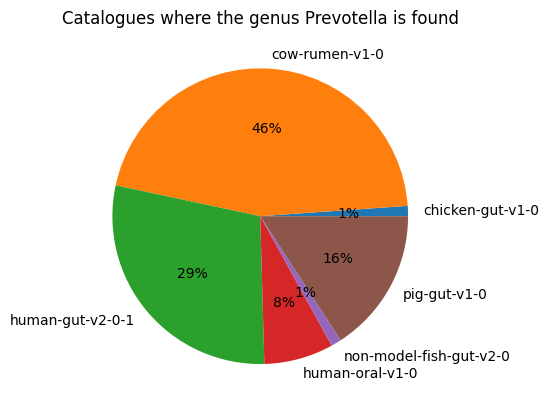

In [204]:
resources_df.groupby('relationships.catalogue.data.id').size().plot(kind='pie', autopct='%1.0f%%')
plt.title('Catalogues where the genus Prevotella is found');

##### What are the most common species from the <i>Prevotella</i> genus across the catalogues?

First, let's see what the total number of distinct lineages are within the Prevotella genus across the catalogues:

In [206]:
resources_df['attributes.taxon-lineage'].nunique()

306

Now let's find 10 most common species:

In [213]:
resources_df['attributes.taxon-lineage'].value_counts().head(10)

d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__                          87
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp002300055     3
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp002251295     3
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900316565     3
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900313215     3
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella hominis         3
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp002299275     3
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900548195     3
d__Bacte

The top record occurs in the catalogues 87 times but there is no species name (the name is ```s__``` indicating that it could not be assigned by GTDB-Tk, the tool that we use for taxonomic analysis). This indicates that the species is not yet known in GTDB.  

<b>Note</b>: the 87 records represent multiple unknown (novel) species. In other words, across the catalogues we have 87
species representative genomes that belong to the genus Prevotella but we don't know what species they are.

The next most common species occurs in the catalogues 3 times and there are at least 9 species like that as we can see from the table (there are likely more but we only printed the first 10 lines). Since our catalogues are dereplicated at the species level, each species can only be found in a biome-specific catalogue once. In total we currently have 9 catalogues so we wouldn't expect the maximum number of occurences for any species to exceed 9.

##### Which catalogues contain the novel Prevotella species?

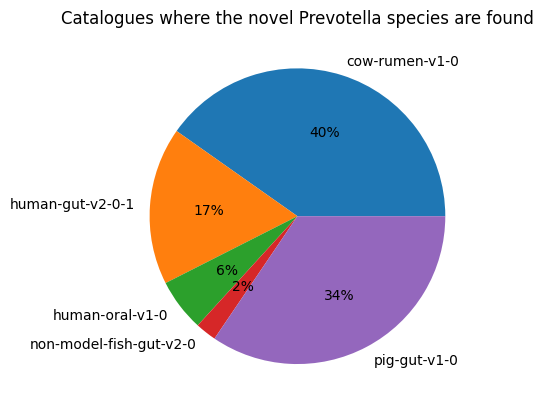

In [215]:
# Save the rows containing novel Prevotella species into a new dataframe
novel_prevotella_df = resources_df[resources_df['attributes.taxon-lineage'] == 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__']
# Plot the catalogues
novel_prevotella_df.groupby('relationships.catalogue.data.id').size().plot(kind='pie', autopct='%1.0f%%')
plt.title('Catalogues where the novel Prevotella species are found');

##### Q: Which catalogue has a higher number of novel Prevotella species?  

##### Q: Which catalogue only contains known Prevotella species?
Hint: compare this pie chart to the previous one - which catalogue disappeared?

#### Task 3: Create a graph showing most common phyla in MGnify Genomes.

For this exercise we will be working with pre-fetched data for all genomes. This is because fetching it takes a while given the number of genomes but if you were fetching it yourself, the code for that is below (expand by clicking on the three dots but please don't execute the code).

In [281]:
endpoint = "genomes"
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    resources_all = map(lambda r: r.json, mgnify.iterate(endpoint))
resources_all_df = pd.json_normalize(resources_all)
resources_all_df.to_parquet('all_genome_resources_Aug2023.parquet')

,type,id,attributes.genome-id,attributes.geographic-origin,attributes.geographic-range,attributes.accession,attributes.ena-sample-accession,attributes.ncbi-genome-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type,attributes.ena-study-accession,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.ncbi-sample-accession
0,genomes,MGYG000321626,17285,Europe,[],MGYG000321626,SAMN33097420,GCA_028655675,PRJNA931735,1881475,145,32562,49.81,Isolate,99.03,0.00,93.28,99.41,97.64,20.0,26,1803,95.73,89.24,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus delbrueckii,1,2023-07-07T11:35:45.488929,2023-07-07T11:35:45.486483,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,NaN,NaN,NaN,NaN,NaN
1,genomes,MGYG000321625,17333,Asia,[Asia],MGYG000321625,SAMN18106362,GCA_026537415,NaN,2042703,39,281954,55.50,MAG,100.00,0.00,0.00,99.61,99.28,20.0,21,1842,89.36,89.03,d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__Bombella;s__,2,2023-07-07T11:37:17.515368,2023-07-07T11:37:17.512635,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,1735.0,1688.0,47.0,NaN
2,genomes,MGYG000321620,17338,Asia,[Asia],MGYG000321620,SAMN18106366,GCA_026537325,NaN,2224927,19,390684,59.87,MAG,97.64,1.78,0.00,99.67,99.18,20.0,14,1811,95.42,93.04,d__Bacteria;p__Actinomycetota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__,7,2023-07-07T11:37:26.626388,2023-07-07T11:37:26.624241,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,2230.0,1526.0,704.0,NaN
3,genomes,MGYG000321606,17269,Asia,[Asia],MGYG000321606,SAMN18106382,GCA_026537035,NaN,2522333,48,138263,34.23,MAG,98.87,0.56,94.96,99.67,99.86,19.0,26,2241,95.85,92.64,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamella;s__Gilliamella sp945273075,12,2023-07-07T11:35:14.099161,2023-07-07T11:35:14.096893,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,2444.0,1872.0,572.0,NaN
4,genomes,MGYG000321602,17200,Asia,[Asia],MGYG000321602,SAMN18106384,GCA_026536965,NaN,2528524,34,177044,35.11,MAG,98.31,0.00,94.96,99.67,99.86,20.0,32,2249,94.49,92.26,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamella;s__Gilliamella apicola_E,19,2023-07-07T11:33:02.552198,2023-07-07T11:33:02.549672,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,3216.0,1678.0,1538.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12525,genomes,MGYG000000005,8452,Europe,"[North America, Europe]",MGYG000000005,ERS417217,NaN,NaN,3930428,32,350032,28.59,Isolate,99.30,0.00,89.08,99.67,99.83,20.0,67,3755,94.30,88.95,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Peptostreptococcaceae;g__Terrisporobacter;s__Terrisporobacter glycolicus_A,2,2021-12-07T19:58:48.526695,2021-12-07T19:58:48.523776,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0-1,genome-catalogues,ERP105624,3622.0,3040.0,582.0,NaN
12526,genomes,MGYG000000004,8822,Europe,"[North America, Europe, Asia, NA]",MGYG

The table with all genomes has been saved as a Parquet file. This file format allows for efficient data storage and retrieval.
The file is located in ../example-data/genomes/ directory and is called ```all_genome_resources_Aug2023.parquet```.

Let's load it into a dataframe ```all_genomes_df```:

In [293]:
all_genomes_df = pd.read_parquet('../example-data/genomes/all_genome_resources_Aug2023.parquet')

In [294]:
# Let's check what this dataframe looks like
all_genomes_df.head()

,type,id,attributes.genome-id,attributes.geographic-origin,attributes.geographic-range,attributes.accession,attributes.ena-sample-accession,attributes.ncbi-genome-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type,attributes.ena-study-accession,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.ncbi-sample-accession
0,genomes,MGYG000321626,17285,Europe,[],MGYG000321626,SAMN33097420,GCA_028655675,PRJNA931735,1881475,145,32562,49.81,Isolate,99.03,0.00,93.28,99.41,97.64,20.0,26,1803,95.73,89.24,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus delbrueckii,1,2023-07-07T11:35:45.488929,2023-07-07T11:35:45.486483,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,None,NaN,NaN,NaN,None
1,genomes,MGYG000321625,17333,Asia,[Asia],MGYG000321625,SAMN18106362,GCA_026537415,None,2042703,39,281954,55.50,MAG,100.00,0.00,0.00,99.61,99.28,20.0,21,1842,89.36,89.03,d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__Bombella;s__,2,2023-07-07T11:37:17.515368,2023-07-07T11:37:17.512635,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,1735.0,1688.0,47.0,None
2,genomes,MGYG000321620,17338,Asia,[Asia],MGYG000321620,SAMN18106366,GCA_026537325,None,2224927,19,390684,59.87,MAG,97.64,1.78,0.00,99.67,99.18,20.0,14,1811,95.42,93.04,d__Bacteria;p__Actinomycetota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__,7,2023-07-07T11:37:26.626388,2023-07-07T11:37:26.624241,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,2230.0,1526.0,704.0,None
3,genomes,MGYG000321606,17269,Asia,[Asia],MGYG000321606,SAMN18106382,GCA_026537035,None,2522333,48,138263,34.23,MAG,98.87,0.56,94.96,99.67,99.86,19.0,26,2241,95.85,92.64,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamella;s__Gilliamella sp945273075,12,2023-07-07T11:35:14.099161,2023-07-07T11:35:14.096893,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,2444.0,1872.0,572.0,None
4,genomes,MGYG000321602,17200,Asia,[Asia],MGYG000321602,SAMN18106384,GCA_026536965,None,2528524,34,177044,35.11,MAG,98.31,0.00,94.96,99.67,99.86,20.0,32,2249,94.49,92.26,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamella;s__Gilliamella apicola_E,19,2023-07-07T11:33:02.552198,2023-07-07T11:33:02.549672,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,3216.0,1678.0,1538.0,None


In [359]:
# Using Pandas we could also do some quick analysis, for example, what is the average GC content of the 
# genomes in MGnify? We can use the .describe() method that calculates statistical information.
all_genomes_df['attributes.gc-content'].describe()


count    12530.000000
mean        47.652266
std         10.627749
min         22.940000
25%         40.070000
50%         48.240000
75%         56.230000
max         74.840000
Name: attributes.gc-content, dtype: float64

This is telling us that in total there are 12,530 GC content records (matching the total number of species representative genomes) and the mean GC% is 47.65%.

Now let's plot the phyla. We need to do some prep work first:

In [295]:
# Split taxon lineage into columns (separate column for each taxonomic level)

# Write each possible taxonomic level into a list called "features"
features = ['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']


def get_lineage_column(lineage_str, i):
    # This is a Python function that takes in a full taxonomic lineage, for example,
    # d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus delbrueckii
    # and returns the value in the requested position. In Python we count from 0 so 
    # if we requested the taxon name in position 1 (i = 1), the function would 
    # return "p__Bacillota"

    lineage_split = lineage_str.split(';')
    return lineage_split[i] 


# Apply the function to create the new columns in the pandas DataFrame by splitting column attributes.taxon-lineage
for i, feature in enumerate(features):
    all_genomes_df[feature] = all_genomes_df['attributes.taxon-lineage'].apply(lambda x: get_lineage_column(x, i))


In [296]:
# Let's see what the new columns look like (scroll to the right)
all_genomes_df

,type,id,attributes.genome-id,attributes.geographic-origin,attributes.geographic-range,attributes.accession,attributes.ena-sample-accession,attributes.ncbi-genome-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type,attributes.ena-study-accession,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.ncbi-sample-accession,domain,phylum,class,order,family,genus,species
0,genomes,MGYG000321626,17285,Europe,[],MGYG000321626,SAMN33097420,GCA_028655675,PRJNA931735,1881475,145,32562,49.81,Isolate,99.03,0.00,93.28,99.41,97.64,20.0,26,1803,95.73,89.24,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus delbrueckii,1,2023-07-07T11:35:45.488929,2023-07-07T11:35:45.486483,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,None,NaN,NaN,NaN,None,d__Bacteria,p__Bacillota,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus delbrueckii
1,genomes,MGYG000321625,17333,Asia,[Asia],MGYG000321625,SAMN18106362,GCA_026537415,None,2042703,39,281954,55.50,MAG,100.00,0.00,0.00,99.61,99.28,20.0,21,1842,89.36,89.03,d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__Bombella;s__,2,2023-07-07T11:37:17.515368,2023-07-07T11:37:17.512635,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,1735.0,1688.0,47.0,None,d__Bacteria,p__Pseudomonadota,c__Alphaproteobacteria,o__Acetobacterales,f__Acetobacteraceae,g__Bombella,s__
2,genomes,MGYG000321620,17338,Asia,[Asia],MGYG000321620,SAMN18106366,GCA_026537325,None,2224927,19,390684,59.87,MAG,97.64,1.78,0.00,99.67,99.18,20.0,14,1811,95.42,93.04,d__Bacteria;p__Actinomycetota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__,7,2023-07-07T11:37:26.626388,2023-07-07T11:37:26.624241,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,2230.0,1526.0,704.0,None,d__Bacteria,p__Actinomycetota,c__Actinomycetia,o__Actinomycetales,f__Bifidobacteriaceae,g__Bifidobacterium,s__
3,genomes,MGYG000321606,17269,Asia,[Asia],MGYG000321606,SAMN18106382,GCA_026537035,None,2522333,48,138263,34.23,MAG,98.87,0.56,94.96,99.67,99.86,19.0,26,2241,95.85,92.64,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamella;s__Gilliamella sp945273075,12,2023-07-07T11:35:14.099161,2023-07-07T11:35:14.096893,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,2444.0,1872.0,572.0,None,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Gilliamella,s__Gilliamella sp945273075
4,genomes,MGYG000321602,17200,Asia,[Asia],MGYG000321602,SAMN18106384,GCA_026536965,None,2528524,34,177044,35.11,MAG,98.31,0.00,94.96,99.67,99.86,20.0,32,2249,94.49,92.26,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamella;s__Gilliamella apicola_E,19,2023-07-07T11:33:02.552198,2023-07-07T11:33:02.549672,root:Host-associated:Insecta:Digestive system,biomes,honeybee-gut-v1-0,genome-catalogues,SRP308969,3216.0,1678.0,1538.0,None,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Gilliamella,s__Gilliamella apicola_E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [348]:
# Use the value_counts() to get the count of each phylum in the corresponding column.
# Sort values from largest to smallest by using method .sort_values(ascending=False) and keep just the first 20
# records (20 most common phyla). Store them in the phylum_counts series (one-dimensional array).

phylum_counts = all_genomes_df['phylum'].value_counts().sort_values(ascending=False).head(20)
phylum_counts

p__Firmicutes_A         4489
p__Bacteroidota         2176
p__Proteobacteria       1397
p__Firmicutes           1268
p__Actinobacteriota     1239
p__Firmicutes_C          287
p__Verrucomicrobiota     259
p__Cyanobacteria         237
p__Spirochaetota         136
p__Patescibacteria       119
p__Pseudomonadota         87
p__Campylobacterota       85
p__Chloroflexota          75
p__Fusobacteriota         73
p__Planctomycetota        58
p__Methanobacteriota      55
p__Desulfobacterota       48
p__Elusimicrobiota        44
p__Marinisomatota         43
p__Bacillota              40
Name: phylum, dtype: int64

We can add up all counts from phylum_counts to see what proportion of all genomes are from the top 20 phyla:

In [349]:
phylum_counts.sum()

12215

This tells us that out of a total of 12,530 genomes, 12,215 are in the 20 most abundant phyla.

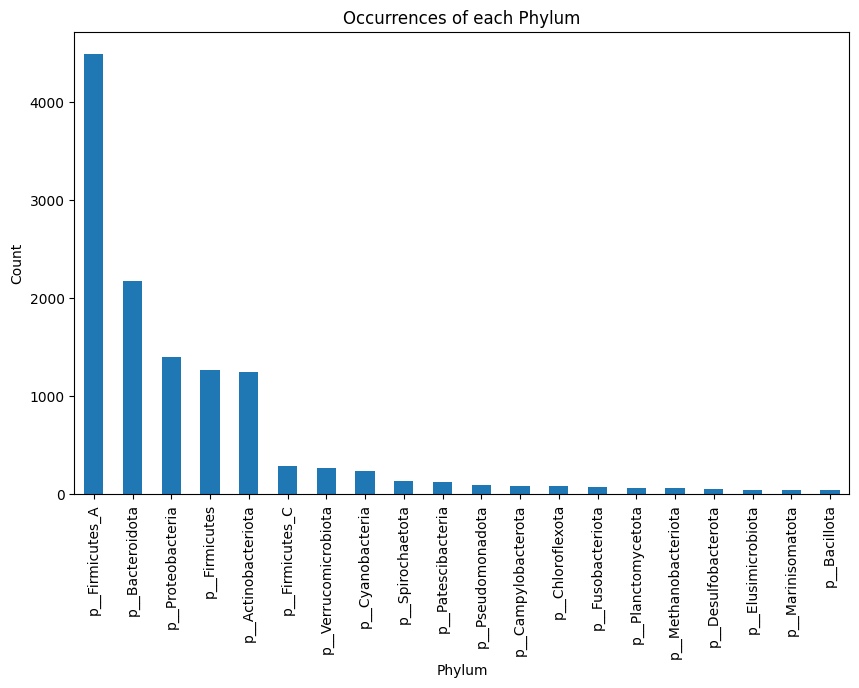

In [350]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
phylum_counts.plot(kind='bar')

# Optional: Customize the plot
plt.title('Occurrences of each Phylum')
plt.xlabel('Phylum')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Task 4:  produce a quality control figure similar to Extended Data Fig. 4a of [Almeida et al 2020](https://www.nature.com/articles/s41587-020-0603-3/figures/10)

Use the ```.describe()``` method to get statistical information for the completeness and contamination columns in the ```all_genomes_df``` dataframe:

In [351]:
all_genomes_df[['attributes.completeness', 'attributes.contamination']].describe()


,attributes.completeness,attributes.contamination
count,12530.000000,12530.000000
mean,89.569388,1.025984
std,10.634815,1.096434
min,50.060000,0.000000
25%,85.120000,0.000000
50%,93.030000,0.740000
75%,97.550000,1.570000
max,100.000000,5.000000


and make a plot:

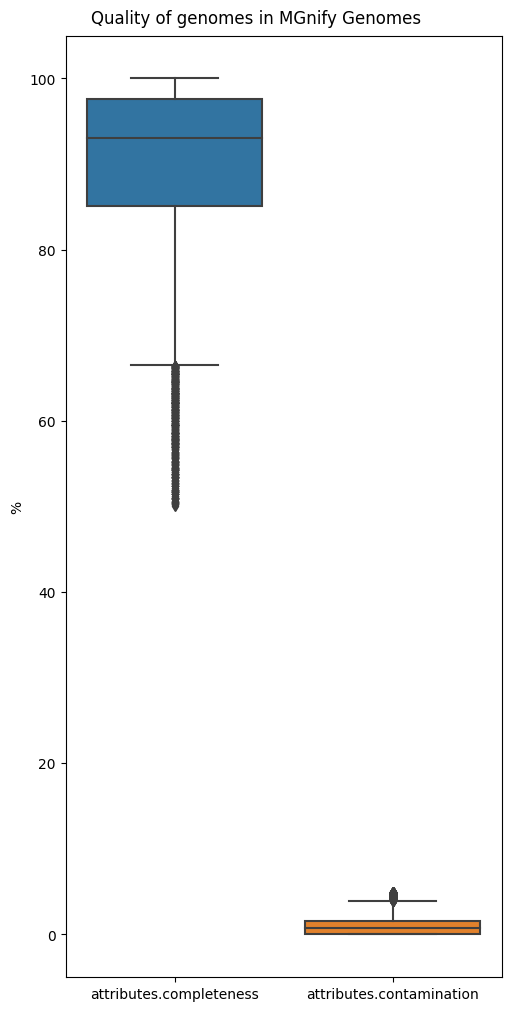

In [353]:
fig = plt.figure(figsize=(5, 10), layout="constrained")  # set the size and layout
spec = fig.add_gridspec(1, 1)  # set the grid

ax00 = fig.add_subplot(spec[0, 0])  # create the placeholder for the boxplot

# Create the boxplot using Seaborn's boxplot function. It visualizes the distribution 
# of two columns from the DataFrame 'all_genomes_df': 'attributes.completeness' and 'attributes.contamination'. 
# The boxplot shows the median, quartiles, and any outliers in the data for each column.
sns.boxplot(data=all_genomes_df[['attributes.completeness', 'attributes.contamination']])

plt.ylabel("%")  # set the y-axis labes to show percentages


fig.suptitle('Quality of genomes in MGnify Genomes');

---
## Bonus section: write your own code.

The goal of this bonus section is to give you an opportunity to try and write code that access the MGnify API yourself. We will provide a template and there is a solution at the bottom if you need help.

#### <b>Task 1</b>: query the API to find out how many genomes there are in catalogue.

First you need to find the API endpoint to use. Open [this link](https://www.ebi.ac.uk/metagenomics/api/v1/genome-catalogues) to look through the list of endpoints. You can click on them to see what information is inside. Once you have picked the endpoint, fill in the blank below:

In [360]:
endpoint = "_________"  # fill in the blank

Write a codeblock below that will start an API session, iterate over the pages using the chosen endpoint and get JSONs for all catalogues. Convert JSONs into a dataframe called `resources_df`. Then print just the columns that contain catalogue name and the number of species in each (the species counts are saved in a variable called `attributes.genome-count` and there are several columns that contain catalogue name, you can pick any one.

<b>Hint</b>: the code for quering the API is the same we already used to fetch analyses for a selected study earlier in the practical (but the endpoint is different)

In [364]:
with ______("_____________________") as mgnify:
    resources = __________________
    resources_df = __________________________
resources_df[['_____________', 'attributes.genome-count']]

NameError: name '______' is not defined

Click on the three dots below to open the solution

In [ ]:
# Solution
endpoint = "genome-catalogues"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    resources = map(lambda r: r.json, mgnify.iterate(endpoint))
    resources_df = pd.json_normalize(resources)
    
# print the columns that contain the catalogue name and the number of genomes in each catalogue
resources_df[['attributes.name', 'attributes.genome-count']]

#### <b>Task 2</b>: generate a pie chart that would show relative sizes of the catalogues. Add catalogue names as labels on the chart.

In [371]:
# Fill in the blanks in this code to generate the pie chart

# Extract the 'attributes.name' and 'attributes.genome-count' columns from the resources_df dataframe
catalogue_names = _________________________
genome_counts = __________________________

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(___________, labels=__________, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Relative Sizes of Catalogues')

# Show the pie chart
____________

NameError: name '_________________________' is not defined

Click on the three dots below to see the solution.

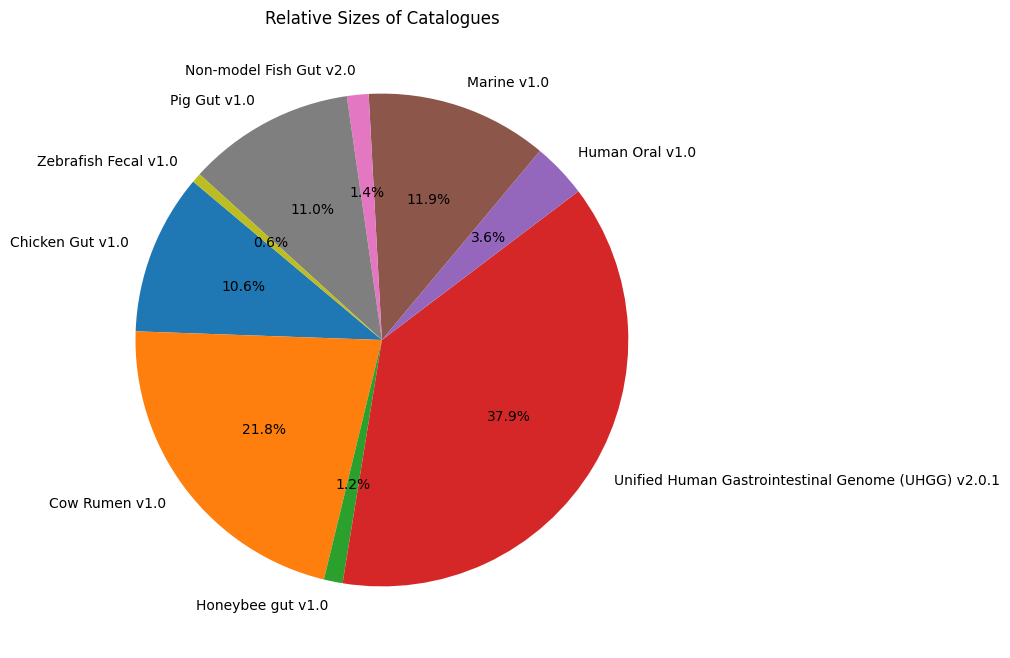

In [370]:
# Solution
# Extract the 'attributes.name' and 'attributes.genome-count' columns
catalogue_names = resources_df['attributes.name']
genome_counts = resources_df['attributes.genome-count']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(genome_counts, labels=catalogue_names, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Relative Sizes of Catalogues')

# Show the pie chart
plt.show()

#### <b>Task 3</b>: download a genome from the API

We have downloaded analysis results earlier in this practical (at the end of Section 1). You can download genomes and annotations in a similar way. 
For this exercise, let's download all predicted CDS for genome `MGYG000321626`.

Start by identifying the endpoint you would need for this [here](https://www.ebi.ac.uk/metagenomics/api/v1/).  

<b>Hint</b>: review what endpoints looked like when we downloaded analyses - they are not always just one level beyond the base URL.

In [ ]:
endpoint = "______________"

Fill in the blanks in the code block below to download the file. To see the file format and description label that we are looking for, use the link to API, navigate to the appropriate endpoint and see what the results look like in the browser.

In [372]:
endpoint = "___________________" 

with APISession("__________________") as session:    
    for download in session.iterate(endpoint):
        # Go over the different files to download until we find the one with CDS results
        cds_file = "MGYG000321626.faa"
        if (
            download.description.label =='_____________'
            and
            download.file_format.name == '_____________'
             ):
                print(f"Downloading the file")
                urlretrieve(_____________________________)
                break
print("Finished downloading", cds_file)

Processing: MGYA00646965
Finished for MGYA00646965
Processing: MGYA00646967
Finished for MGYA00646967


Click on the three dots below to see the solution.

In [378]:
endpoint = "genomes/MGYG000321626/downloads"  # we are only interested in a specific genome

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as session:    
    for download in session.iterate(endpoint):
        # Go over the different files to download until we find the one with CDS results
        cds_file = "MGYG000321626.faa"
        if (
            download.description.label =='Predicted CDS (aa)'
            and
            download.file_format.name == 'FASTA'
             ):
                print(f"Downloading the file")
                urlretrieve(download.links.self.url, cds_file)
                break
print("Finished downloading", cds_file)

Finished downloading MGYG000321626.faa
